# Importación de Bibliotecas
En esta sección, importamos todas las bibliotecas necesarias para el análisis y la visualización de datos, incluyendo `numpy`, `pandas`, `matplotlib`, `seaborn`, `plotly`, y otras herramientas útiles. También inicializamos el modo offline para `plotly` y configuramos `matplotlib` para visualizar gráficos dentro del cuaderno.


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import warnings
import ydata_profiling as pandas_profiling
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
py.offline.init_notebook_mode(connected = True)
%matplotlib inline

# Carga de Datos
Cargamos los datos desde un archivo Excel llamado 'base_prueba_tecnica.xlsx' utilizando `pandas`. Los primeros registros del conjunto de datos se muestran para tener una vista preliminar de la estructura de los datos.


In [ ]:
file_path = 'base_prueba_tecnica.xlsx'
df = pd.read_excel(file_path)
df.head()

ID  Edad     Genero  Ingresos Anuales  Gasto Mensual  \
0   1    21  Masculino            222011           2297   
1   2    26  Masculino            239229           3420   
2   3    38  Masculino            716278          36965   
3   4    64   Femenino            697325           9846   
4   5    52   Femenino           1032569           6607   

   Puntuación de Crédito Región  Comportamiento en linea  \
0                    335    Sur                        8   
1                    329  Oeste                       10   
2                    711  Oeste                        9   
3                    855    Sur                        2   
4                    989    Sur                        3   

   Compras en el ultimo año  
0                        81  
1                        27  
2                        82  
3                         6  
4                         2

# EDA
## Generación de Reporte de Perfilamiento
Utilizamos `pandas_profiling` para generar un reporte de perfilamiento exhaustivo del conjunto de datos. Este reporte proporciona una visión general rápida de la calidad de los datos, incluyendo tipos de datos, valores faltantes, estadísticas descriptivas y distribuciones de variables.


In [ ]:
profiling=pandas_profiling.ProfileReport(df)
profiling

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


In [ ]:
df.shape

(3000, 9)

In [ ]:
df.describe()

ID         Edad  Ingresos Anuales  Gasto Mensual  \
count  3000.000000  3000.000000      3.000000e+03    3000.000000   
mean   1500.500000    43.137000      7.458787e+05   17036.542667   
std     866.169729    16.239339      5.394438e+05   12741.646988   
min       1.000000    18.000000      1.000170e+05    1012.000000   
25%     750.750000    27.000000      2.324990e+05    4731.750000   
50%    1500.500000    46.000000      7.170055e+05   16474.000000   
75%    2250.250000    57.000000      1.109204e+06   26681.250000   
max    3000.000000    70.000000      1.998151e+06   44975.000000   

       Puntuación de Crédito  Comportamiento en linea  \
count            3000.000000              3000.000000   
mean              641.390333                 6.303667   
std               222.962069                 3.272057   
min               300.000000                 1.000000   
25%               435.000000                 3.000000   
50%               627.000000                 8.000000   
75%               848.000000                 9.000000   
max               999.000000                10.000000   

       Compras en el ultimo año  
count               3000.000000  
mean                  58.933000  
std                   48.234967  
min                    1.000000  
25%                    8.000000  
50%                   57.000000  
75%                   98.000000  
max                  150.000000

## Tipos de Datos
Revisamos los tipos de datos de las columnas en el DataFrame para asegurarnos de que cada atributo tenga el tipo de dato apropiado para su naturaleza (numérico, categórico, etc.)

In [ ]:
df.dtypes

ID                           int64
Edad                         int64
Genero                      object
Ingresos Anuales             int64
Gasto Mensual                int64
Puntuación de Crédito        int64
Región                      object
Comportamiento en linea      int64
Compras en el ultimo año     int64
dtype: object

## Valores Faltantes
Evaluamos la presencia de valores faltantes en el conjunto de datos. 

In [ ]:
df.isnull().sum()

ID                          0
Edad                        0
Genero                      0
Ingresos Anuales            0
Gasto Mensual               0
Puntuación de Crédito       0
Región                      0
Comportamiento en linea     0
Compras en el ultimo año    0
dtype: int64

## Distribución de Variables Numéricas
Visualizamos las distribuciones de variables numéricas importantes como 'Edad', 'Ingresos Anuales' y 'Gasto Mensual' usando histogramas. 

/tmp/ipykernel_128/3410843563.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_128/3410843563.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_128/3410843563.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

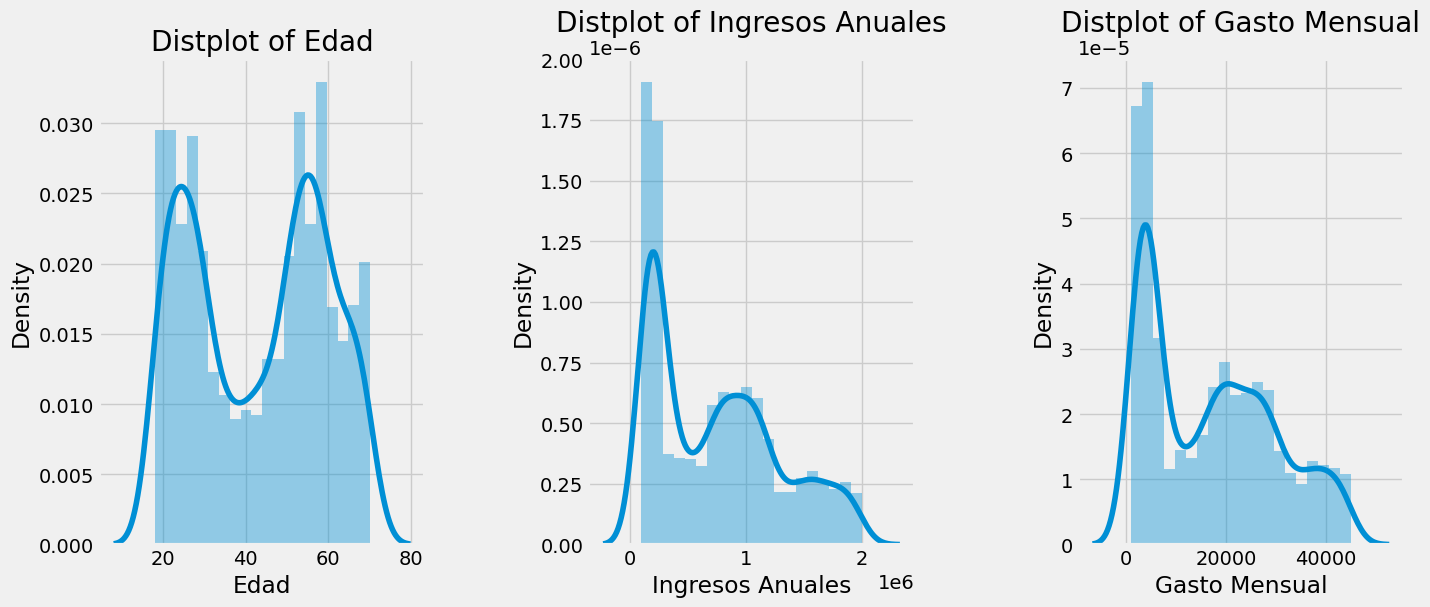

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Edad' , 'Ingresos Anuales' , 'Gasto Mensual']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

## Distribución de la Variable Categórica 'Género'


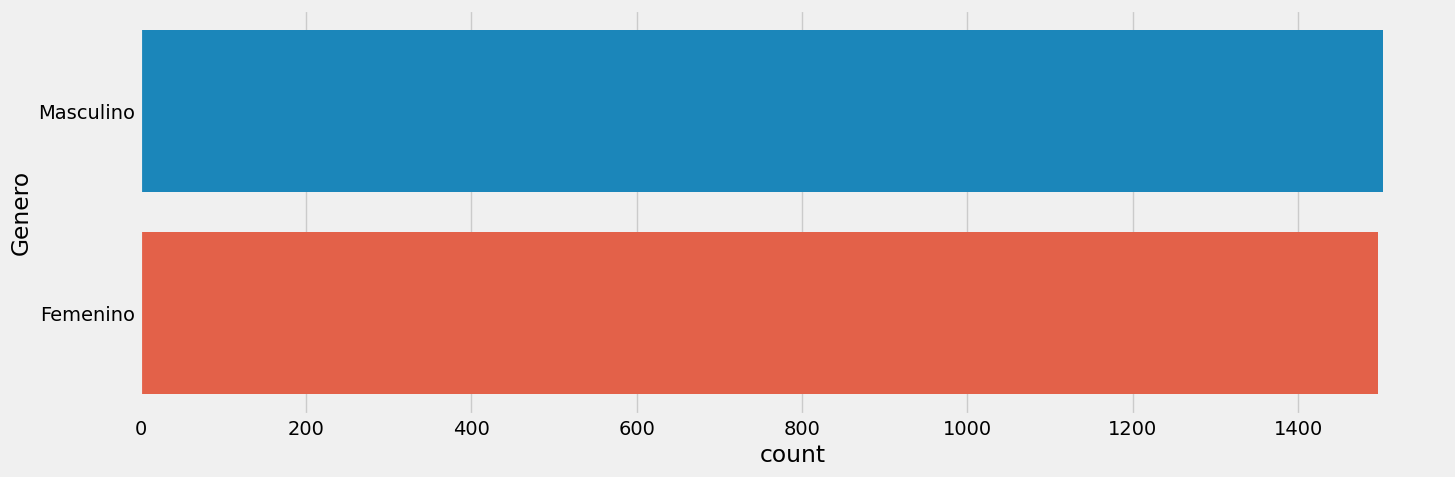

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Genero' , data = df)
plt.show()

## Visualización de Pares 



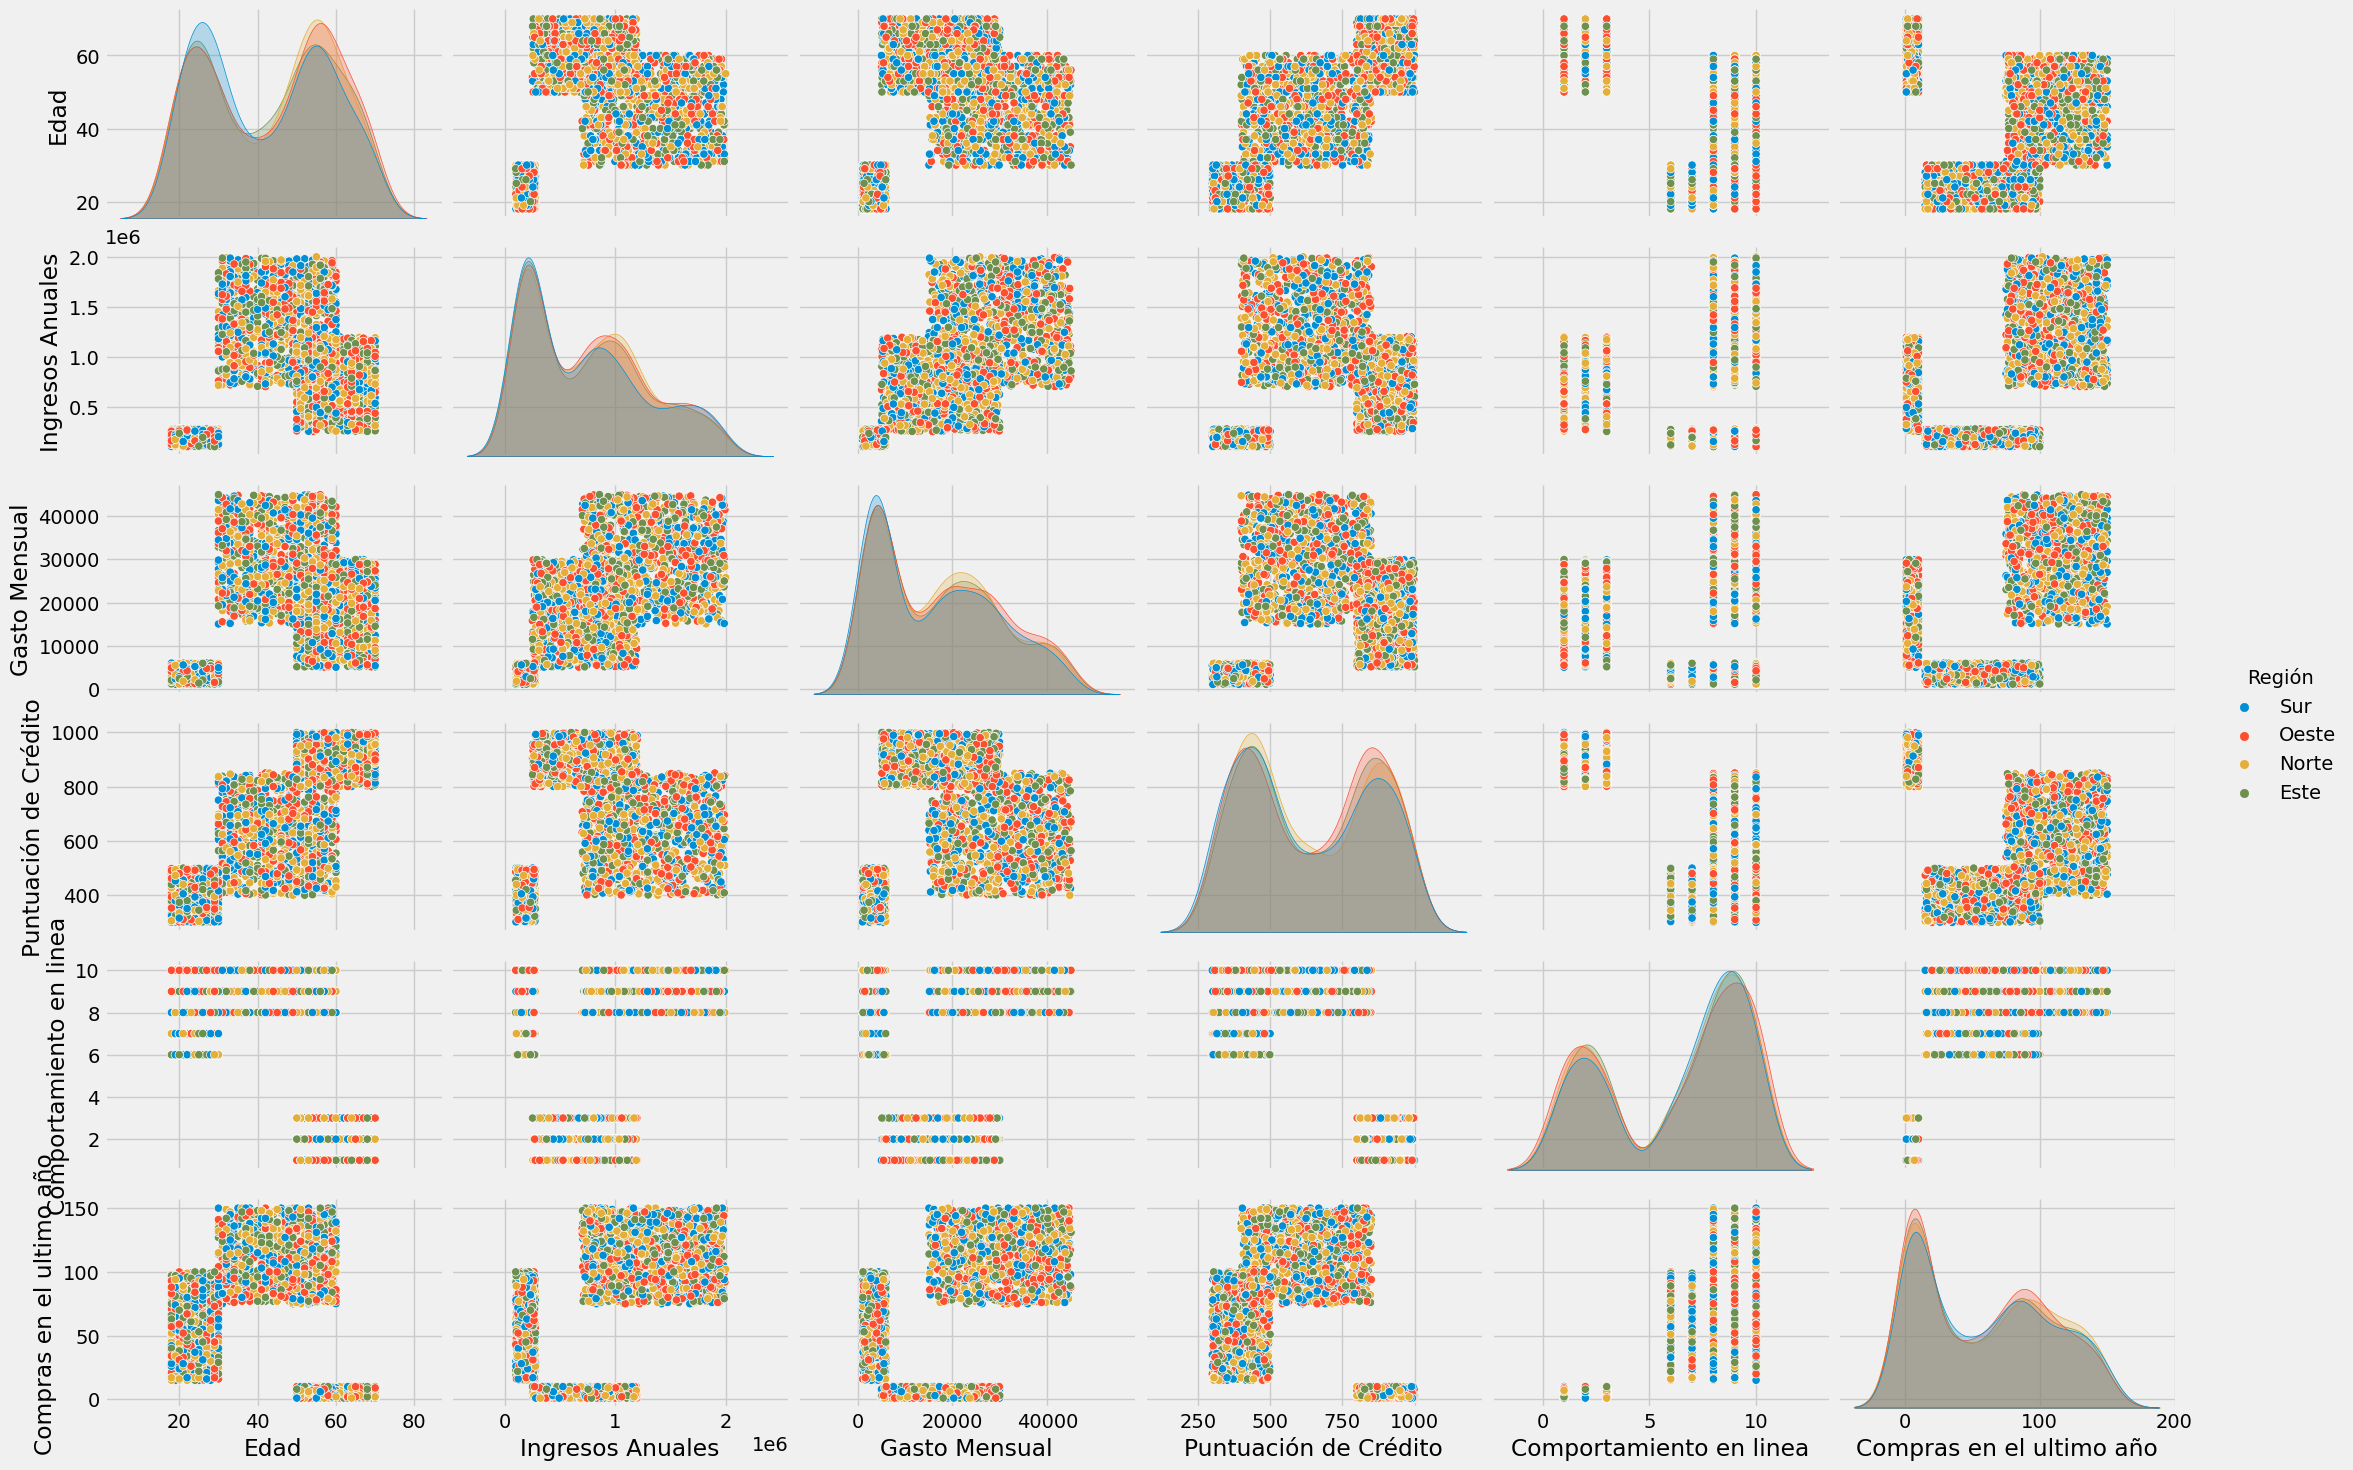

In [ ]:
X = df.drop(['ID', 'Región'], axis=1)  # Asumiendo que quieres eliminar 'ID' y 'Región' de X
sns.pairplot(df.drop('ID', axis=1), hue='Región', aspect=1.5)  # Usar 'Región' para el coloreado
plt.show()


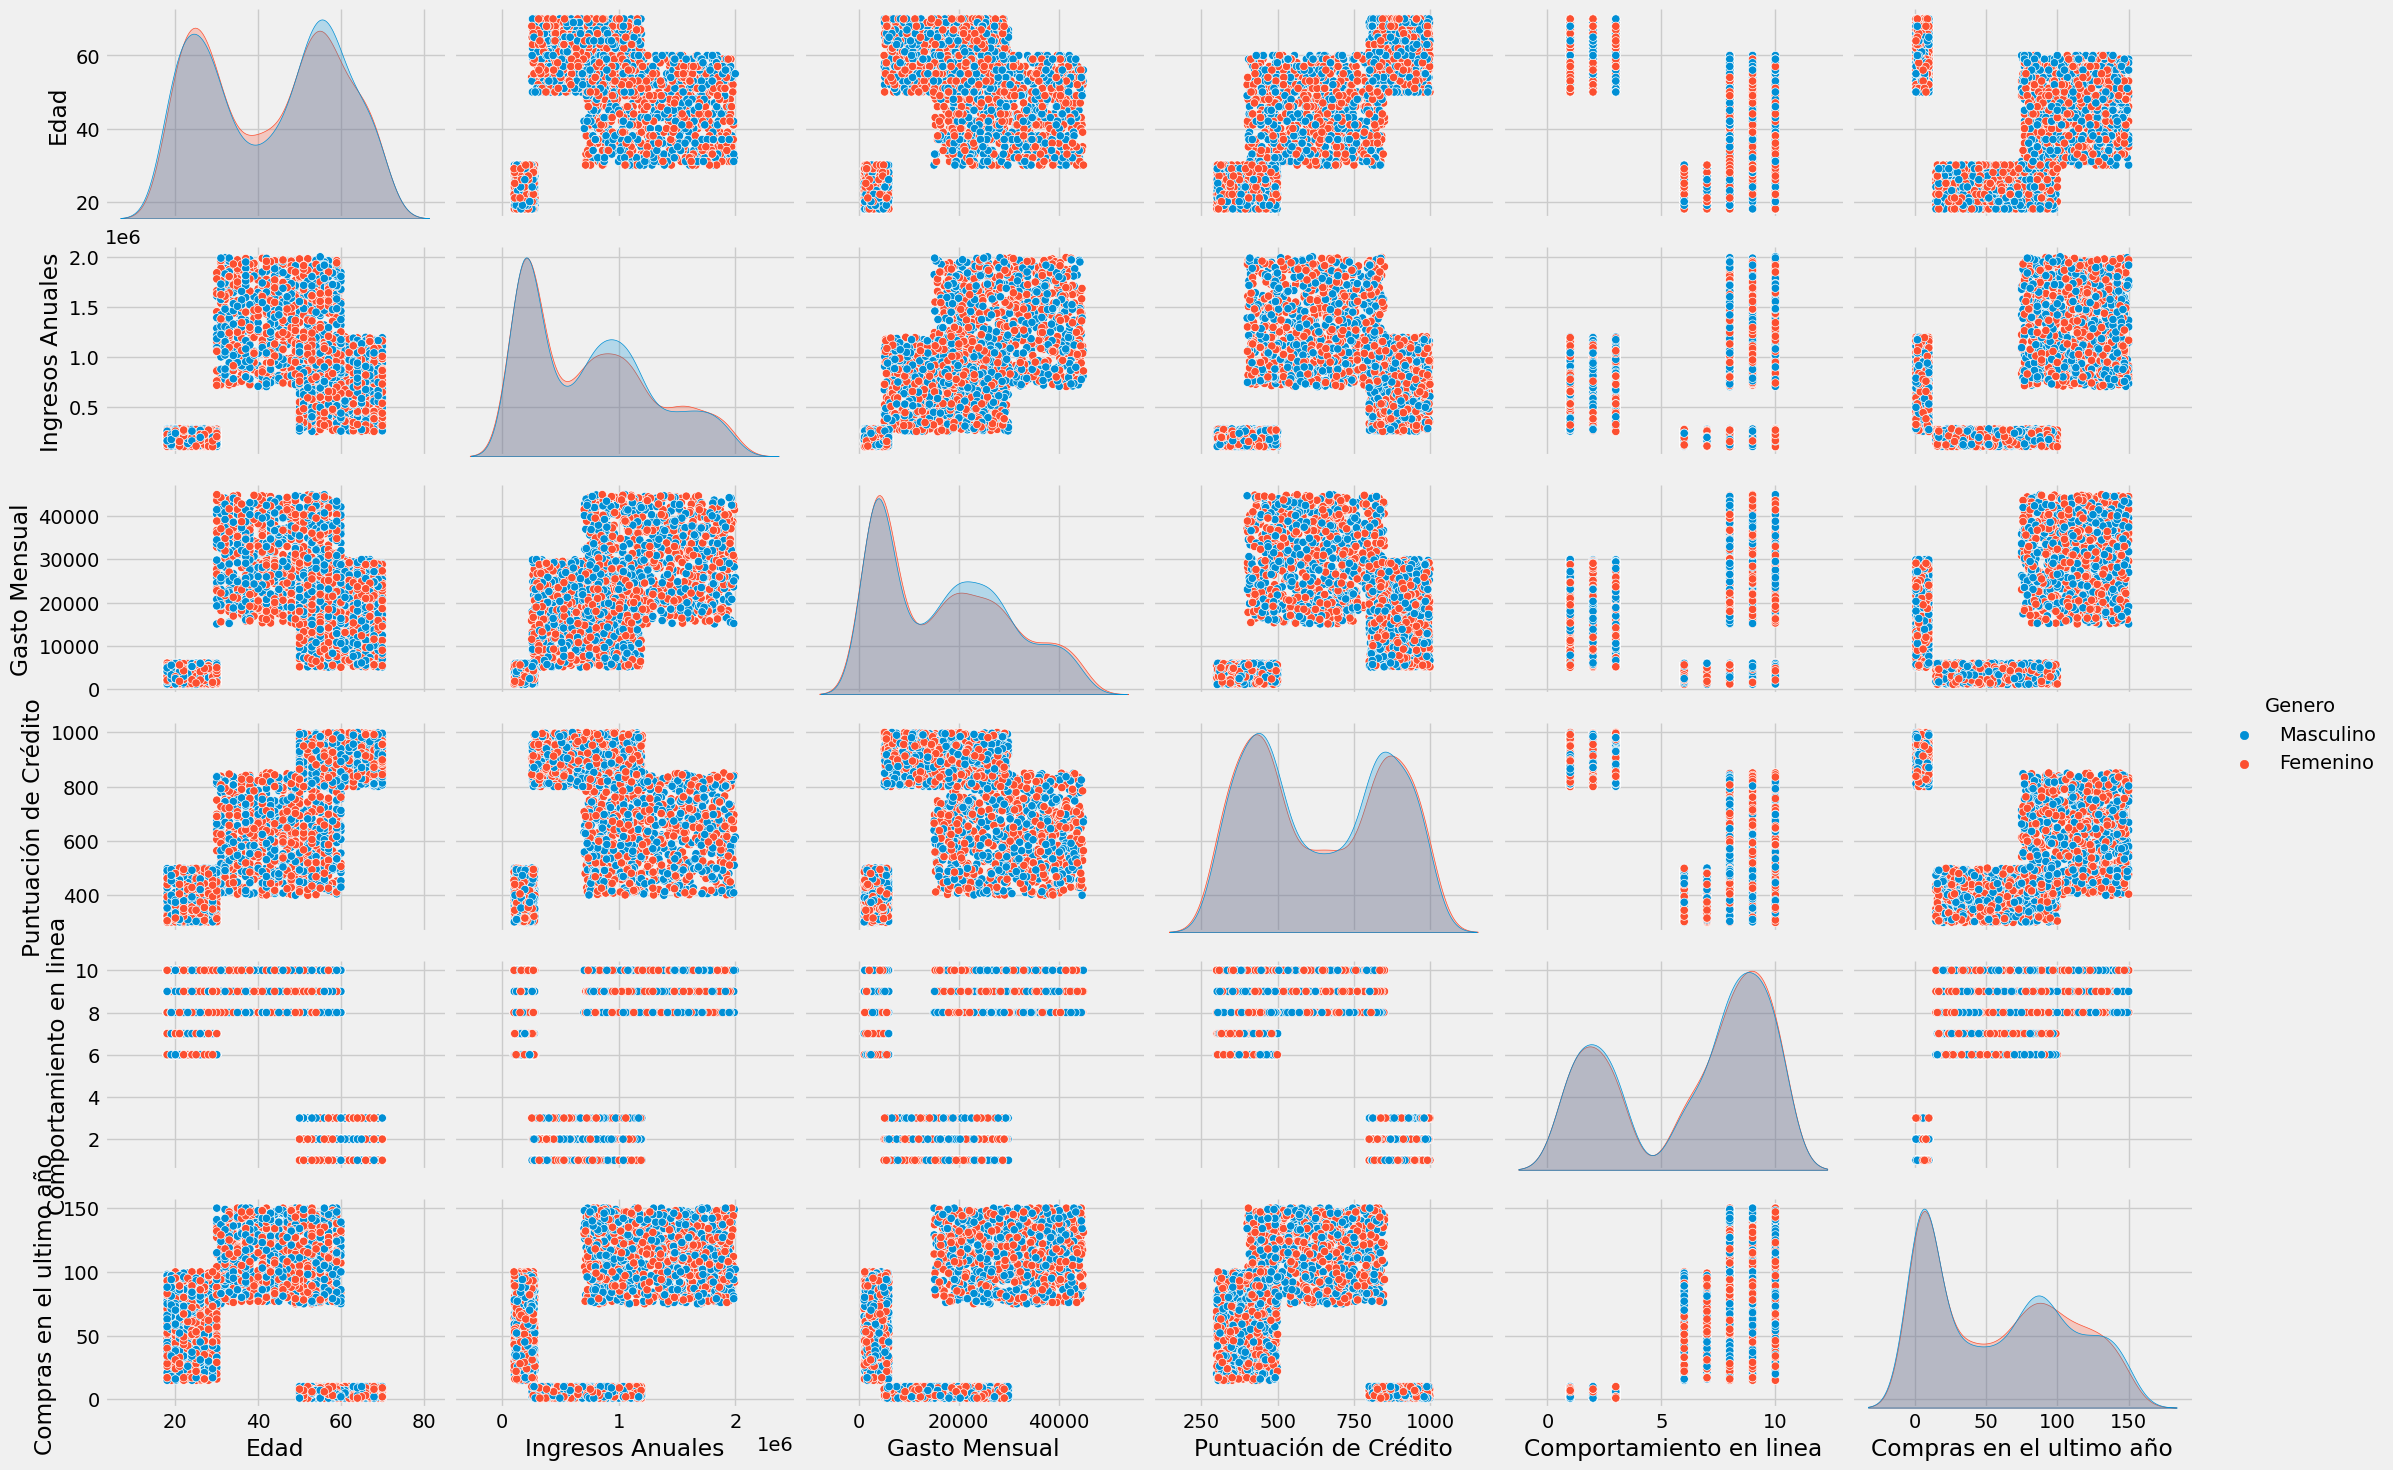

In [ ]:
X = df.drop(['ID', 'Genero'], axis=1)
sns.pairplot(df.drop('ID', axis=1), hue='Genero', aspect=1.5)
plt.show()

## Análisis de Correlación
Calculamos la matriz de correlación para 'Edad', 'Ingresos Anuales', 'Gasto Mensual', 'Puntuación de Crédito', 'Comportamiento en línea' y 'Compras en el último año'. 


In [ ]:
columnas_seleccionadas = ['Edad', 'Ingresos Anuales', 'Gasto Mensual','Puntuación de Crédito',	'Comportamiento en linea',	'Compras en el ultimo año']
correlacion = df[columnas_seleccionadas].corr()
print(correlacion)


                              Edad  Ingresos Anuales  Gasto Mensual  \
Edad                      1.000000          0.438571       0.467588   
Ingresos Anuales          0.438571          1.000000       0.734275   
Gasto Mensual             0.467588          0.734275       1.000000   
Puntuación de Crédito     0.826753          0.346943       0.374231   
Comportamiento en linea  -0.623042          0.134922       0.090453   
Compras en el ultimo año -0.311414          0.436229       0.401099   

                          Puntuación de Crédito  Comportamiento en linea  \
Edad                                   0.826753                -0.623042   
Ingresos Anuales                       0.346943                 0.134922   
Gasto Mensual                          0.374231                 0.090453   
Puntuación de Crédito                  1.000000                -0.723811   
Comportamiento en linea               -0.723811                 1.000000   
Compras en el ultimo año              -0.43851

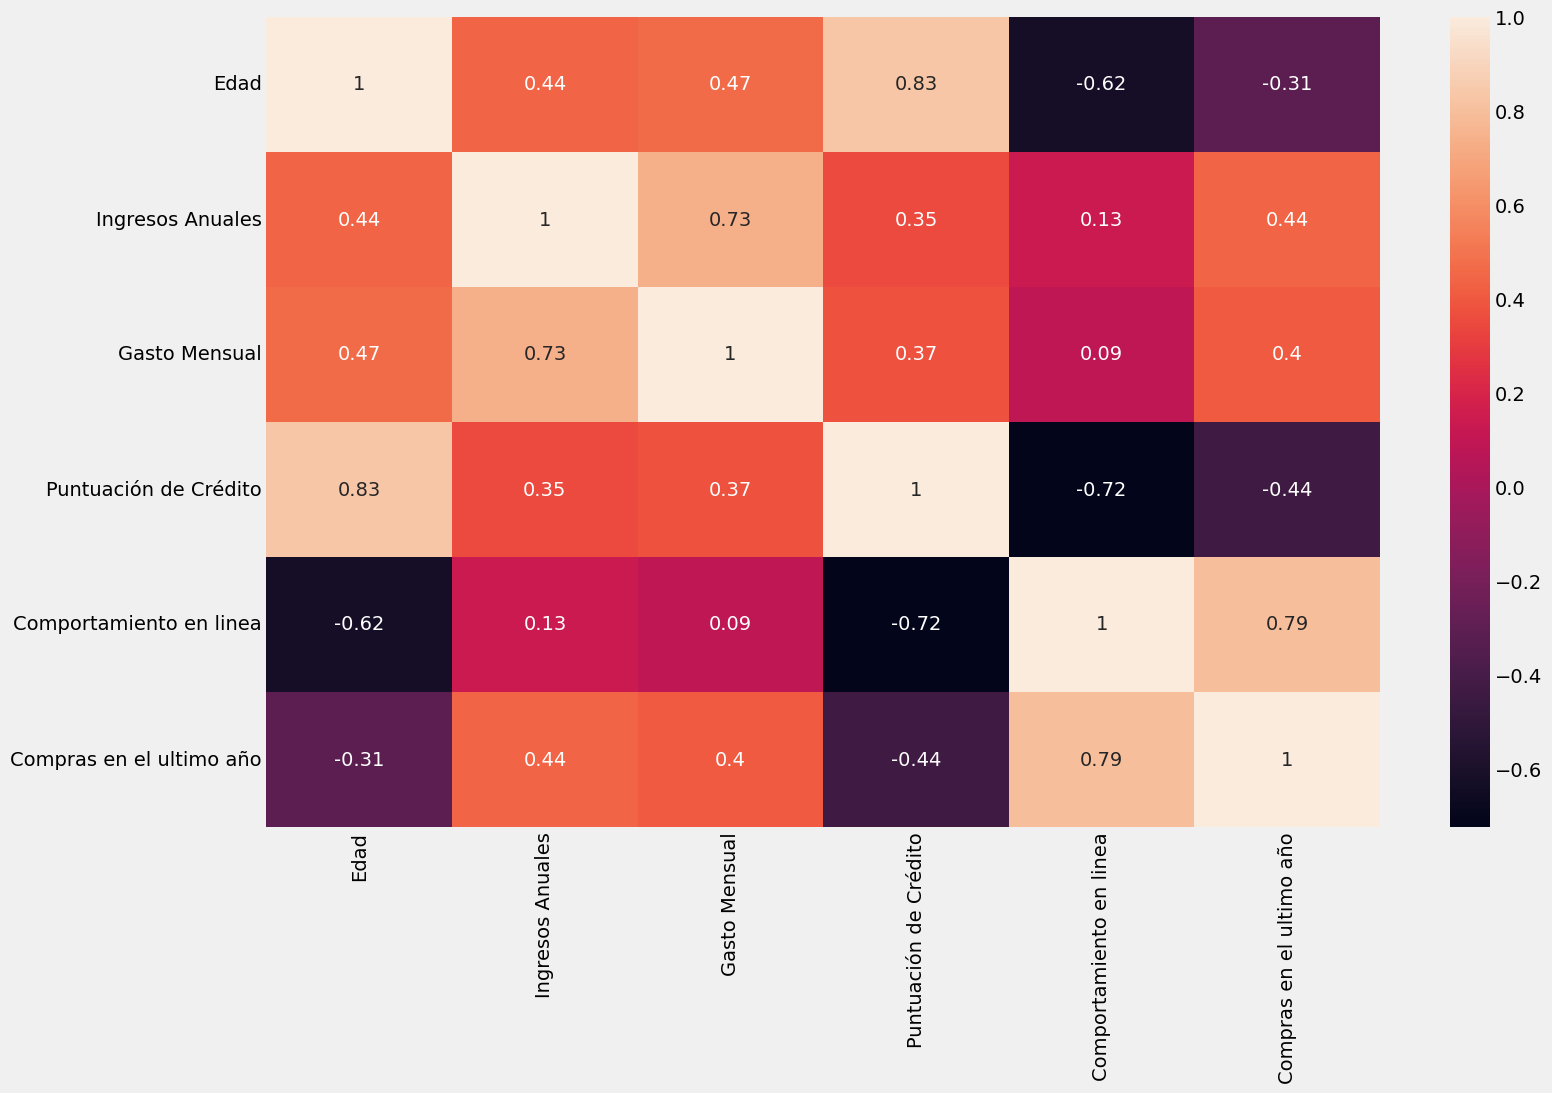

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(correlacion, annot=True)
plt.show()


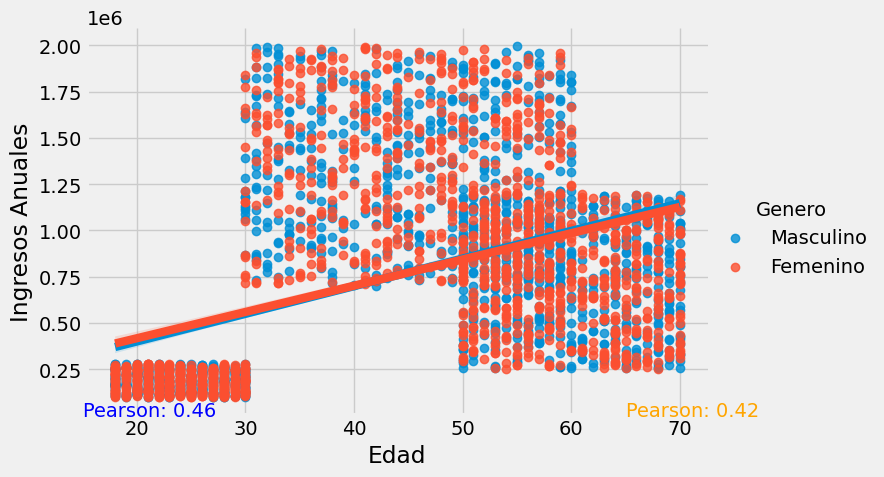

In [ ]:
#Armar los diferentes subsets
males_age = df[df['Genero']=='Masculino']['Edad'] 
females_age = df[df['Genero']=='Femenino']['Edad']
males_spending = df[df['Genero']=='Masculino']['Gasto Mensual'] 
females_spending = df[df['Genero']=='Femenino']['Gasto Mensual'] 
males_income = df[df['Genero']=='Masculino']['Ingresos Anuales'] 
females_income = df[df['Genero']=='Femenino']['Ingresos Anuales'] 


corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot(x = 'Edad', y ='Ingresos Anuales', data=df, hue='Genero',
          aspect=1.5)

plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

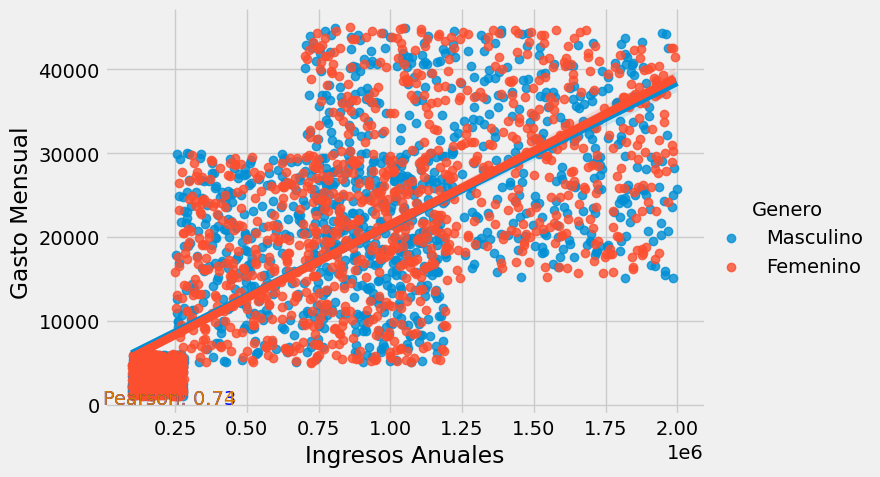

In [ ]:
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot(x ='Ingresos Anuales',y = 'Gasto Mensual', data=df, hue='Genero',
          aspect=1.5)

plt.text(130,23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130,77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

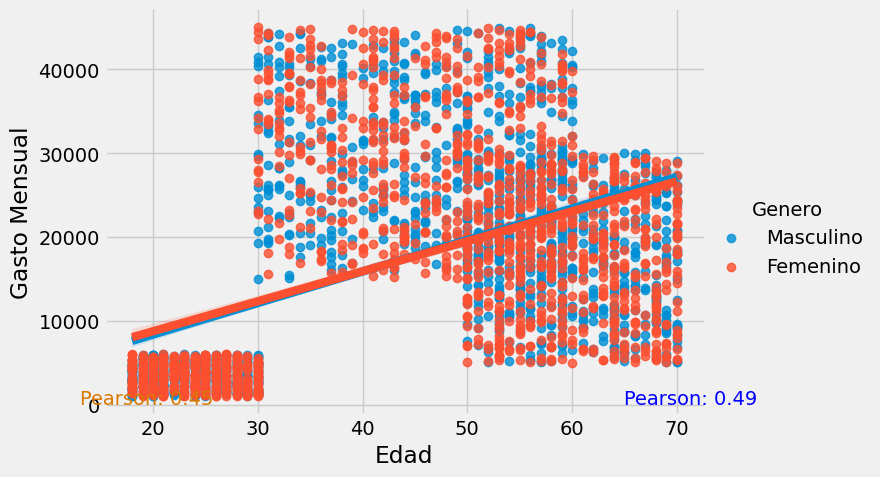

In [ ]:
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot(x ='Edad', y ='Gasto Mensual', data=df, hue='Genero',
          aspect=1.5)

plt.text(65,65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13,83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

# Preprocesamiento

Unicamente vamos a tener en cuenta las variables númericas debido a que las variables categoricas de Genero y Region, tienen exactamente el mismo comportamiento en todas las columnas numericas. Por tanto, no aportan al modelo y serán imputadas.

El dataset tampoco cuenta con outliers o valores faltantes por lo que no es necesario tratar estos comportamientos.

## Selección de Método de Escalado de Variables

Al preparar nuestros datos para el modelado, es crucial elegir la técnica de escalado adecuada. En este caso, hemos optado por utilizar `MinMaxScaler` en lugar de `StandardScaler`. La elección se basa en la observación de que nuestras variables de interés no siguen una distribución normal.

`MinMaxScaler` transforma las características escalando cada una al rango dado (por defecto entre 0 y 1), lo cual es especialmente útil cuando las distribuciones no siguen una distribución gaussiana. 

Dado que las visualizaciones de las distribuciones de nuestras variables revelan desviaciones de la normalidad, como sesgo o la presencia de múltiples picos, `MinMaxScaler` se presenta como la opción más adecuada. Esto asegura que nuestras variables se escaleen de manera efectiva, manteniendo sus distribuciones originales y mejorando la performance de los modelos de aprendizaje automático que sean sensibles a la escala de los datos.


In [ ]:
numeric_columns = ['Edad', 'Ingresos Anuales', 'Gasto Mensual', 'Puntuación de Crédito', 'Comportamiento en linea', 'Compras en el ultimo año']


scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df_scaled.to_csv('..data/df_scaled.csv', index=False)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2c3340da-be44-447c-b509-9b133ff28053' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>